https://github.com/dataquestio/project-walkthroughs/tree/master/speech_recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from pydub import AudioSegment

# #importing file from location by giving its path
# sound = AudioSegment.from_mp3("/content/drive/MyDrive/s2s/Bdb001.interaction.wav")

# #Selecting Portion we want to cut
# StrtMin = 0
# StrtSec = 8

# EndMin = 0
# EndSec = 70

# # Time to milliseconds conversion
# StrtTime = StrtMin*60*1000+StrtSec*1000
# EndTime = StrtMin*60*1000+EndSec*1000

# # Opening file and extracting portion of it
# extract = sound[StrtTime:EndTime]

# # Saving file in required location
# extract.export("/content/drive/MyDrive/s2s/short.mp3", format="mp3")

# # new file portion.mp3 is saved at required location

%pip install vosk

In [ ]:
!pip install vosk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vosk import Model, KaldiRecognizer

In [ ]:
FRAME_RATE = 16000
CHANNELS=1

model = Model(model_name="vosk-model-en-us-0.22")
# For a smaller download size, use model = Model(model_name="vosk-model-small-en-us-0.15")
rec = KaldiRecognizer(model, FRAME_RATE)
rec.SetWords(True)

In [ ]:
%pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment

In [ ]:
mp3 = AudioSegment.from_mp3("/content/drive/MyDrive/s2s/short.mp3")
# mp3 = AudioSegment.from_mp3("/content/drive/MyDrive/s2s/Bdb001.interaction.wav")
mp3 = mp3.set_channels(CHANNELS)
mp3 = mp3.set_frame_rate(FRAME_RATE)

In [ ]:
rec.AcceptWaveform(mp3.raw_data)
result = rec.Result()

In [ ]:
import json
text = json.loads(result)["text"]

In [ ]:
text

"morgan wants to make it hard but it doesn't it did it i didn't even check yesterday yesterday either when i started it so i dunno if it doesn't like luxury channel three you know i discovered something yesterday on these dumb wireless ones you can tell if it's picking up breath noise and stuff yet has a little indicator on on the a f so if you yeah if you breathe under breathe and then you see a f go off then you know picking up your mouth nice well that's good because we have a lot of lab tests in fact if you listen to the channels of people talking yeah what did you see hannibal recent years was actually very disconcerting okay so i was going to try to get out of here like in half an hour because i have people coming and"

%pip install transformers

In [ ]:
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


%pip install torch -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# !wget https://alphacephei.com/vosk/models/vosk-recasepunc-en-0.22.zip

In [ ]:
# !unzip /content/vosk-recasepunc-en-0.22.zip -d /content/drive/MyDrive/s2s

In [ ]:
import subprocess

cased = subprocess.check_output('python /content/drive/MyDrive/s2s/vosk-recasepunc-en-0.22/recasepunc.py predict /content/drive/MyDrive/s2s/vosk-recasepunc-en-0.22/checkpoint', shell=True, text=True, input=text)

In [ ]:
cased

"Morgan wants to make it hard, but it doesn ' t. It did it. I didn ' t even check yesterday yesterday either when I started it. So I dunno if it doesn ' t like Luxury channel three. You know I discovered something yesterday on these dumb wireless ones. You can tell if it ' s picking up breath, noise and stuff yet has a little indicator on on the A F. So if you. Yeah, if you breathe under breathe and then you see a F go off, then you know, picking up your mouth. Nice. Well, that ' s good because we have a lot of lab tests. In fact, if you listen to the channels of people talking, yeah, what did you see ? Hannibal recent years was actually very disconcerting Okay, so I was going to try to get out of here like in half an hour because I have people coming and.\n"

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")
# For a smaller model, use: summarizer = pipeline("summarization", model="t5-small")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# split_tokens = transcript.split(" ")
split_tokens = cased.split(" ")

docs = []

for i in range(0, len(split_tokens), 850):
    selection = " ".join(split_tokens[i:(i+850)])
    docs.append(selection)

In [ ]:
summaries = summarizer(docs)

In [ ]:
summary = "\n\n".join([d["summary_text"] for d in summaries])

In [ ]:
print(summary)

 You can tell if it 's picking up breath, noise and stuff yet has a little indicator on on the A F . If you breathe under breathe and then you see a F go off, then you know, picking up your mouth . Well, that 's good because we have a lot of lab tests . In fact, if you listen to the channels of people talking, yeah, what did you see ? Hannibal recent years was actually very disconcerting .


In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [ ]:
import IPython

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

1.13.1+cu116
0.13.1+cu116


In [ ]:
!pip install deep-phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
summary='''
You can tell if it 's picking up breath, noise and stuff yet has a little indicator on on the A F . If you breathe under breathe and then you see a F go off, then you know, picking up your mouth . Well, that 's good because we have a lot of lab tests . In fact, if you listen to the channels of people talking, yeah, what did you see ? Hannibal recent years was actually very disconcerting .
'''

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = summary

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

/usr/local/lib/python3.8/dist-packages/torchaudio/models/tacotron2.py:856: UserWarning: Reached max decoder steps. The generated spectrogram might not cover the whole transcript.
  warnings.warn(


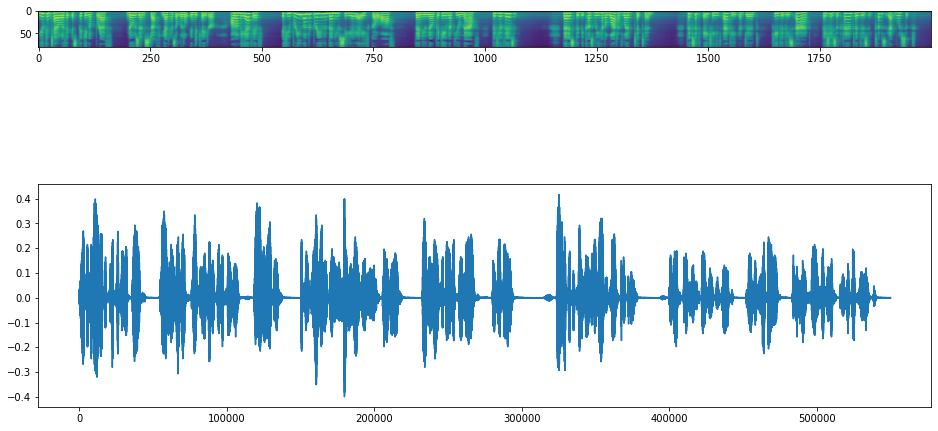

In [ ]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms[0].cpu().detach())

In [ ]:
torchaudio.save('/content/drive/MyDrive/s2s/short_result.wav', waveforms.cpu(), vocoder.sample_rate)

In [ ]:
summary

"\nYou can tell if it 's picking up breath, noise and stuff yet has a little indicator on on the A F . If you breathe under breathe and then you see a F go off, then you know, picking up your mouth . Well, that 's good because we have a lot of lab tests . In fact, if you listen to the channels of people talking, yeah, what did you see ? Hannibal recent years was actually very disconcerting .\n"